In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Loading

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Info

In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [39]:
#to get count of each area-type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [26]:
#to get houses available on 16-Dec
df.loc[df['availability'] == '16-Dec']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1576,Super built-up Area,16-Dec,Yelachenahalli,2 BHK,NaN,2400,1.0,1.0,150.0
6432,Plot Area,16-Dec,Sarjapura - Attibele Road,3 Bedroom,NaN,1800,3.0,2.0,90.0
8840,Plot Area,16-Dec,Chikka Tirupathi,4 Bedroom,Theanmp,4500,5.0,3.0,150.0
9113,Super built-up Area,16-Dec,Hegde Nagar,3 BHK,Soiniy,1703,3.0,2.0,130.0


In [22]:
#to get Theanmp houses 
df.loc[df['society'] == 'Theanmp']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
1265,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2325,4.0,1.0,120.0
1535,Built-up Area,Ready To Move,Chikka Tirupathi,5 Bedroom,Theanmp,3356,5.0,2.0,105.0
2675,Plot Area,18-May,Chikka Tirupathi,3 Bedroom,Theanmp,3297,3.0,1.0,135.0
2745,Plot Area,18-Dec,Chikka Tirupathi,4 Bedroom,Theanmp,3500,5.0,3.0,150.0
8394,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,3056,5.0,NaN,100.0
8840,Plot Area,16-Dec,Chikka Tirupathi,4 Bedroom,Theanmp,4500,5.0,3.0,150.0
8877,Built-up Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2704,5.0,0.0,105.0
10018,Plot Area,18-Mar,Chikka Tirupathi,3 Bedroom,Theanmp,2325,3.0,NaN,95.0
11348,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2325,4.0,1.0,120.0


In [21]:
#to get no. of 5 bedroom houses 
print("No of 5 bedroom houses = ",len(df.loc[df['size'] == '5 Bedroom']))

No of 5 bedroom houses =  297


In [35]:
#to get houses with max price above
df['price'].max()

3600.0

In [38]:
#to get house with price between 500 & 1000
df.query('price > 500 and price < 1000')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0
539,Built-up Area,Ready To Move,7th Block Jayanagar,5 Bedroom,NaN,3000,3.0,1.0,528.0
...,...,...,...,...,...,...,...,...,...
12896,Super built-up Area,Ready To Move,Infantry Road,5 BHK,NaN,4000,5.0,NaN,680.0
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0
13104,Built-up Area,19-Dec,Church Street,4 BHK,CoDast,2920,4.0,3.0,536.0


In [45]:
# to know which all size houses are there
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Drop features that are not required to build our model

In [8]:
df1=df.drop(['society','balcony','bath'],axis='columns')
df1.head()

,area_type,availability,location,size,total_sqft,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,51.00


In [9]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [10]:
df1.tail()

,area_type,availability,location,size,total_sqft,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,17.0


# Find NA values

In [11]:
#df2['area_type'].unique() = 4
#df2['availability'].nunique() = 80
#df2['location'].nunique() = 1304
#df2['size'].nunique() = 31
#df2['total_sqft'].nunique() = 2110
#df2['price'].nunique() = 1985
df1.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
price            0
dtype: int64

# To fill NA values

In [12]:
df1.fillna(method='ffill',inplace=True)
df1

,area_type,availability,location,size,total_sqft,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,488.00


In [13]:
df1.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
price           0
dtype: int64

## Label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [15]:
a = ['area_type', 'availability', 'location', 'size','total_sqft']
df[a] = df[a].apply(lenc.fit_transform)
df_le = df[a]
df1.update(df_le)
df1

,area_type,availability,location,size,total_sqft,price
0,3,40,419,13,70,39.07
1,2,80,317,19,1288,120.00
2,0,80,1179,16,514,62.00
3,3,80,757,16,602,95.00
4,3,80,716,13,239,51.00
...,...,...,...,...,...,...
13315,0,80,1252,22,1499,231.00
13316,3,80,1004,18,1535,400.00
13317,0,80,972,13,172,60.00
13318,3,32,907,18,1680,488.00


In [16]:
df1.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
price           0
dtype: int64

In [17]:
#since NA values are small better to drop them
# df2=df1.fillna()
#mean_value=df1['location'].mean()
# df2['location'].fillna(df2['location'].mean(), inplace=True)
# df2.isnull().sum()

# Plotting boxplot

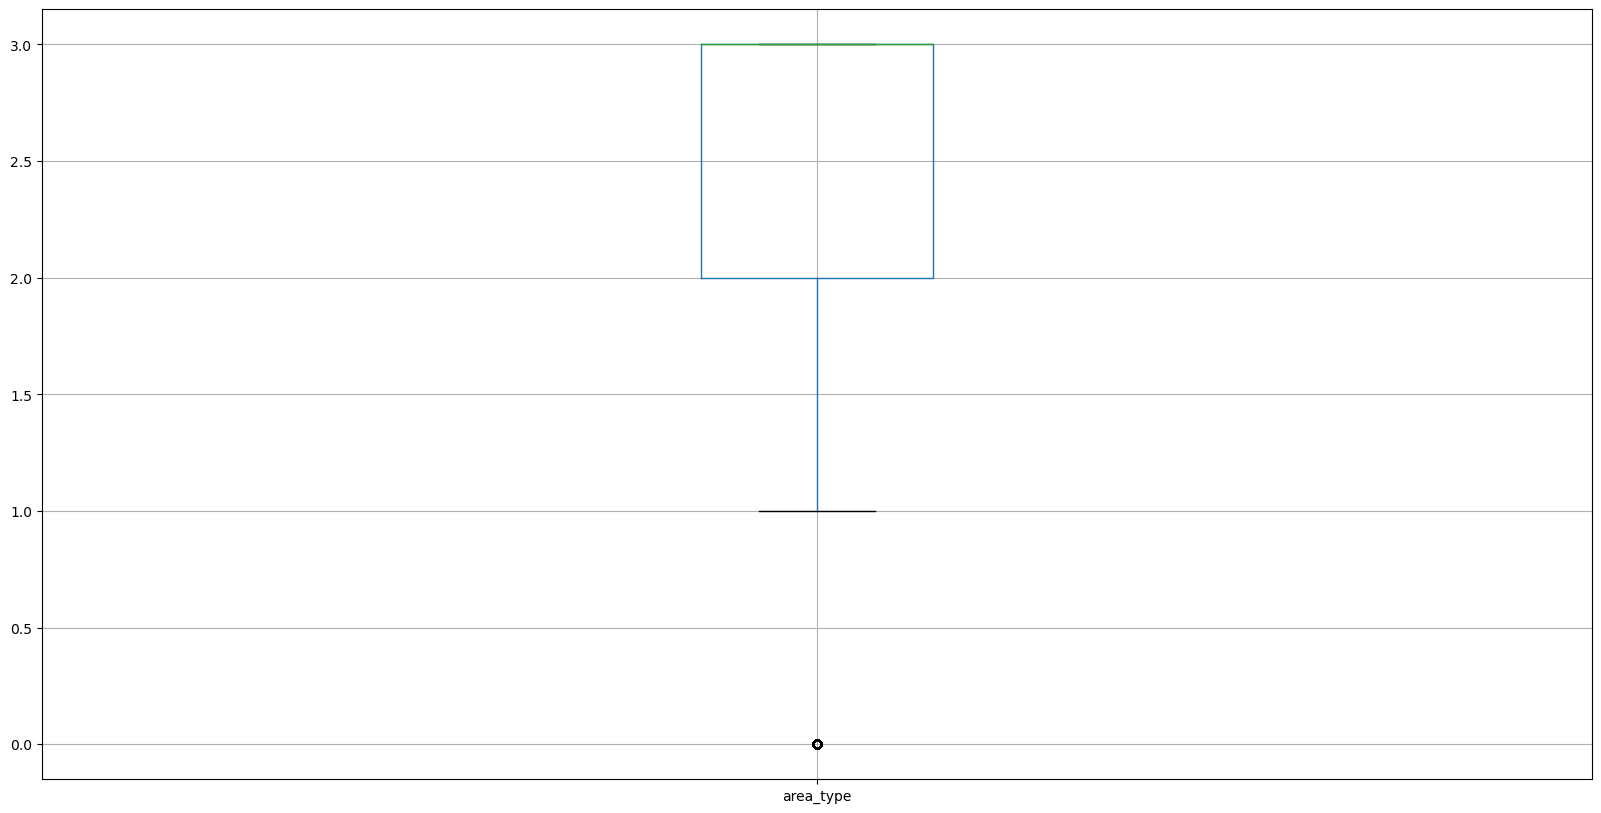

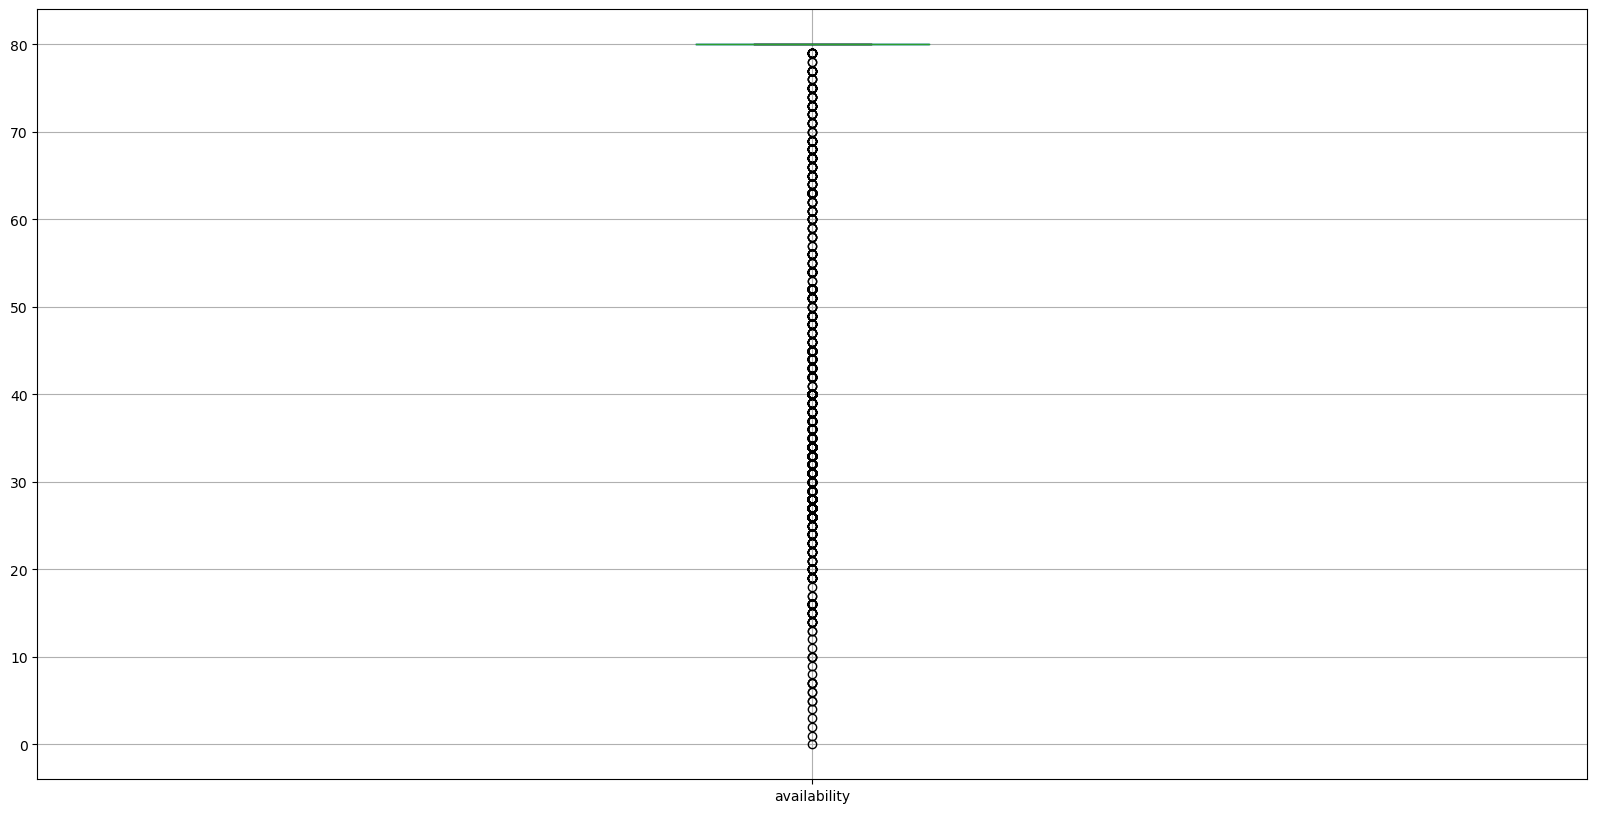

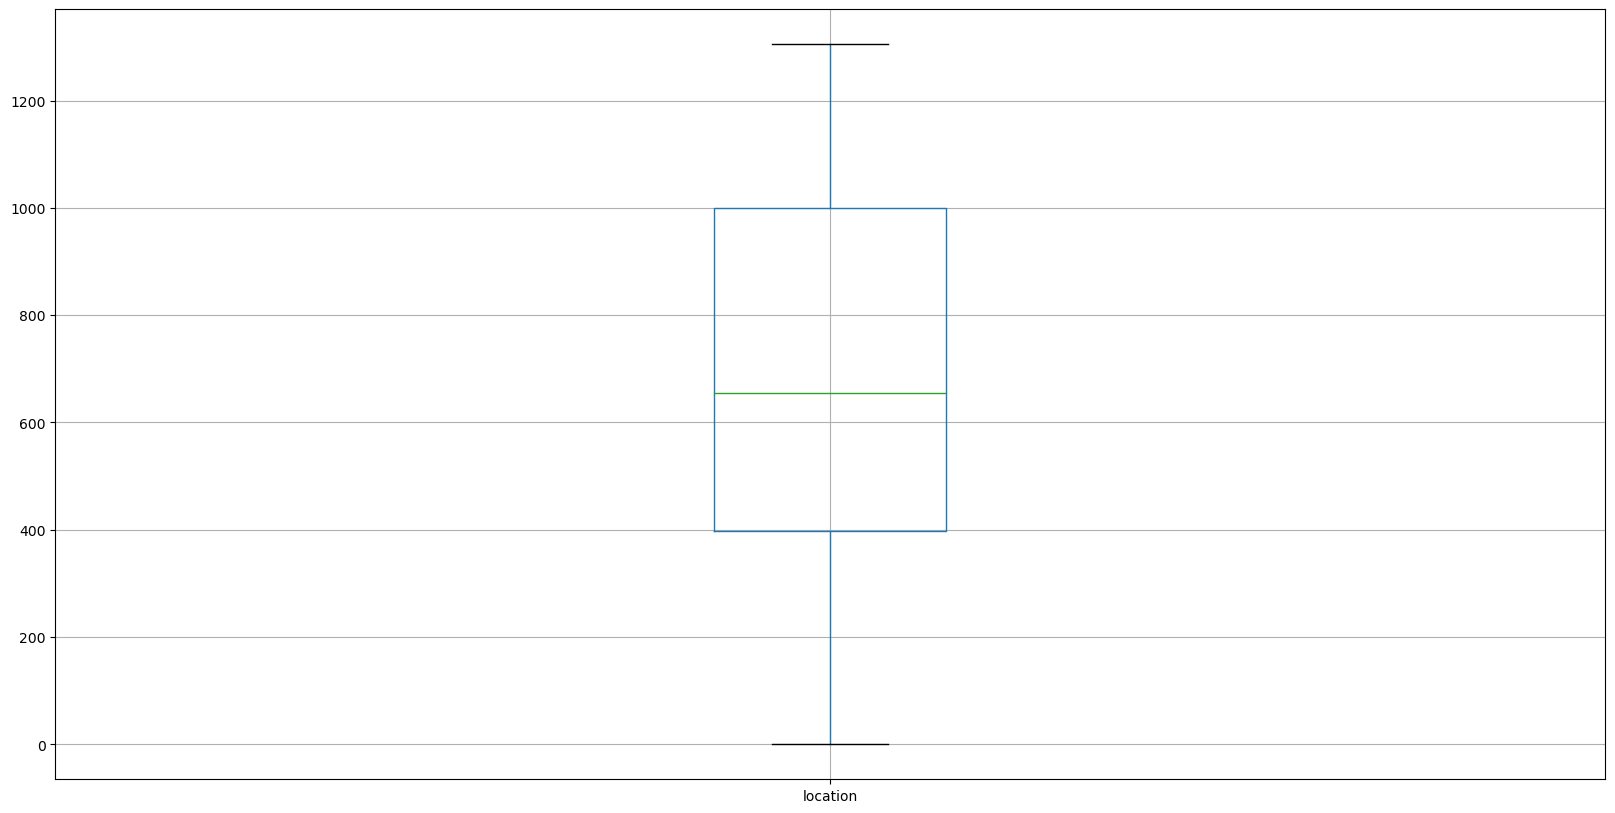

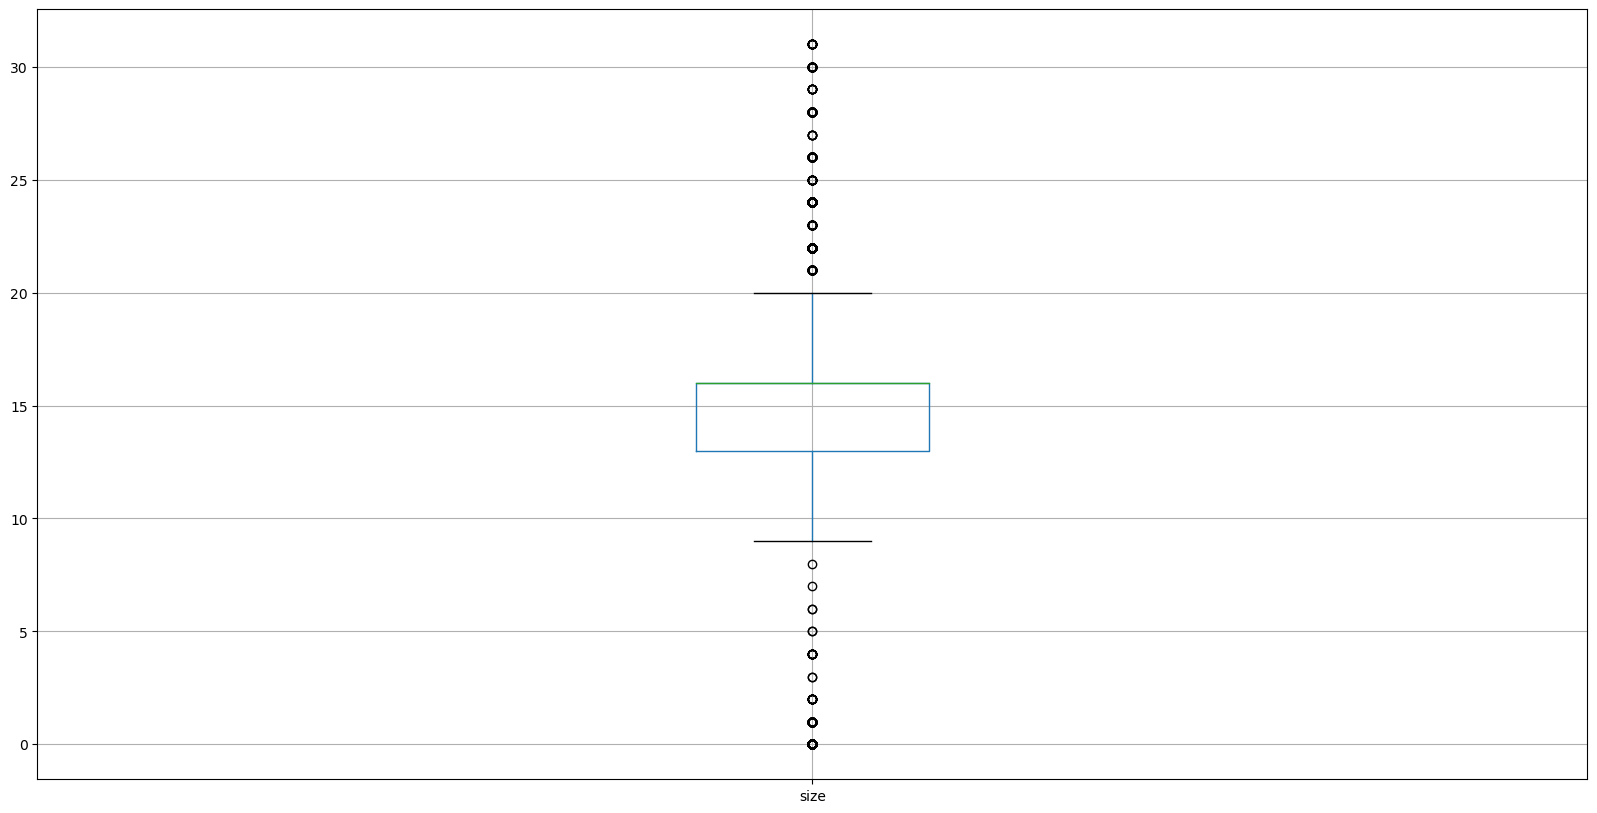

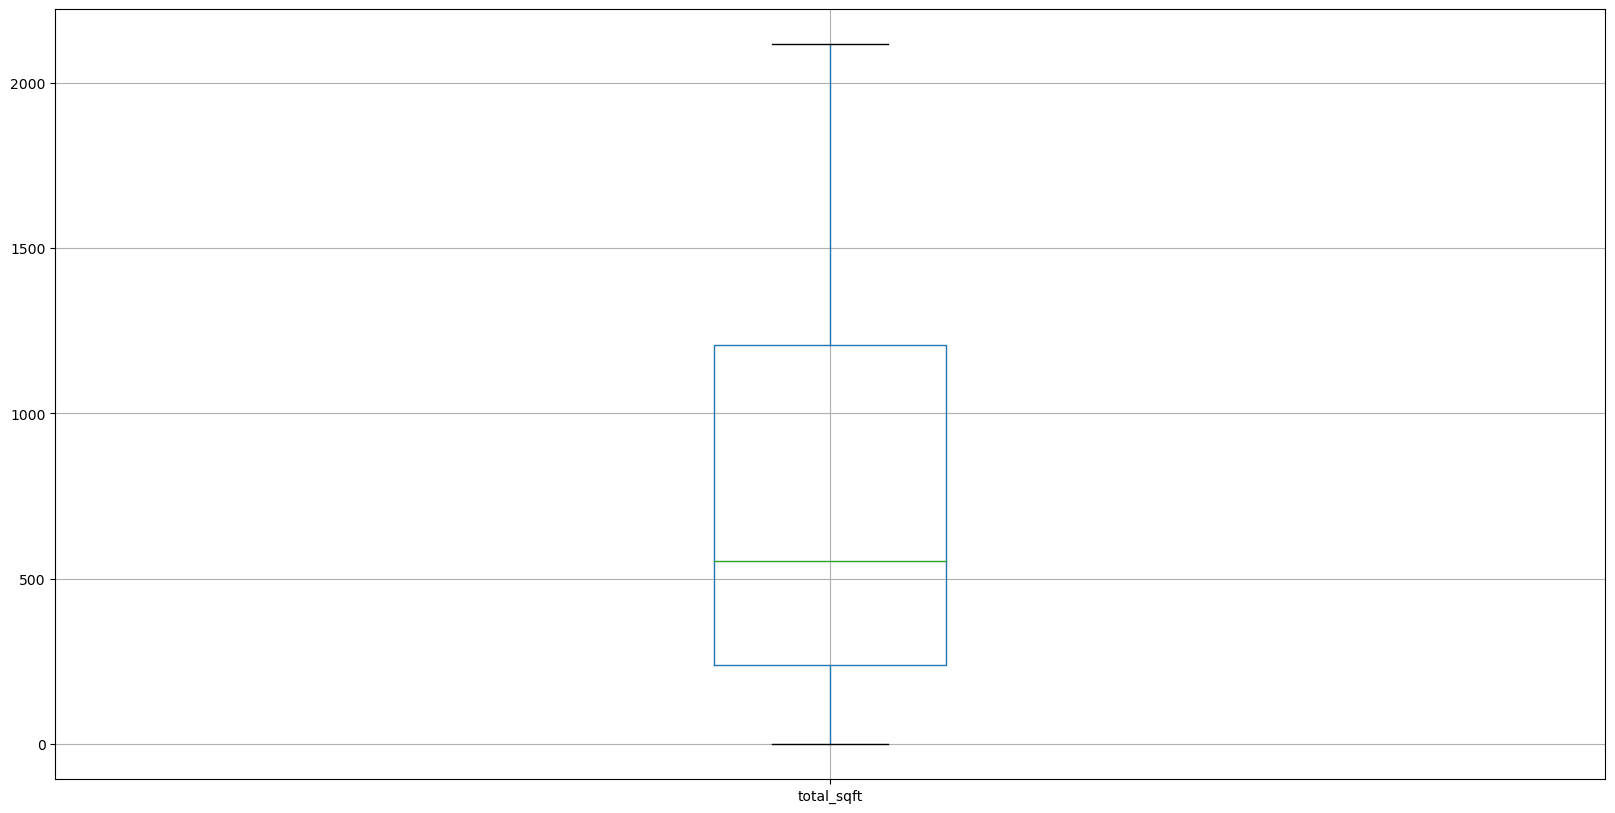

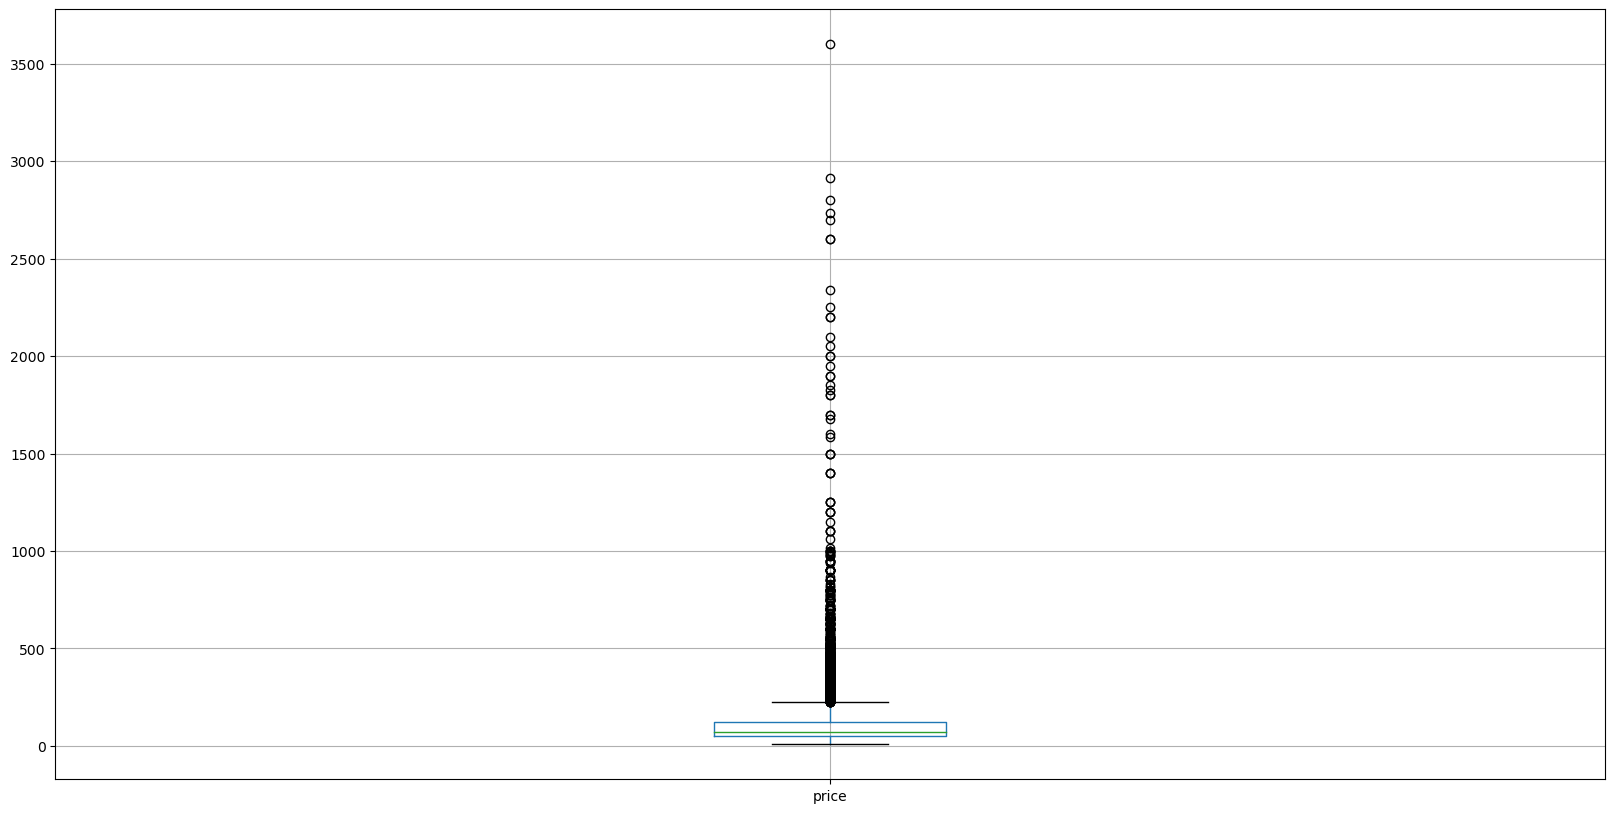

In [18]:
for i in df1.columns:
    df.boxplot(column=i)
    plt.show()

# Outlier Detection

In [19]:
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25)
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit,upper_limit

features=['area_type', 'availability', 'location', 'size','total_sqft']
outlier={}
for column in features:
    lower_limit,upper_limit=IQR_values(df,column)
    outlier[column]=[lower_limit,upper_limit]
outlier 

{'area_type': [0.5, 4.5],
 'availability': [80.0, 80.0],
 'location': [-506.0, 1902.0],
 'size': [8.5, 20.5],
 'total_sqft': [-1214.5, 2661.5]}

In [20]:
# To find out outier index
outindx=[]
for i in features:
    df_outl=(df1[i]>outlier[i][1])|(df1[i]<outlier[i][0])
    x=df1.loc[df_outl].index
    outindx.append(x)
outindx

[Int64Index([    2,    13,    20,    27,    34,    39,    40,    49,    52,
                56,
             ...
             13254, 13260, 13262, 13263, 13278, 13280, 13307, 13308, 13315,
             13317],
            dtype='int64', length=2418),
 Int64Index([    0,     6,    10,    21,    24,    25,    27,    28,    30,
                35,
             ...
             13265, 13266, 13268, 13282, 13288, 13291, 13292, 13295, 13299,
             13318],
            dtype='int64', length=2739),
 Int64Index([], dtype='int64'),
 Int64Index([    9,    20,    24,    42,    43,    45,    58,    64,    68,
                79,
             ...
             13277, 13279, 13281, 13291, 13300, 13303, 13305, 13311, 13315,
             13319],
            dtype='int64', length=1512),
 Int64Index([], dtype='int64')]

# Removal of outliers

In [21]:
# for i in range(len(features)):
#     df1.loc[outindx[i],features[i]]=df1[features[i]].mode()
# df1

In [22]:
df1.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
price           0
dtype: int64

#                                    MODELLING

# Train_test_split

In [23]:
df1

,area_type,availability,location,size,total_sqft,price
0,3,40,419,13,70,39.07
1,2,80,317,19,1288,120.00
2,0,80,1179,16,514,62.00
3,3,80,757,16,602,95.00
4,3,80,716,13,239,51.00
...,...,...,...,...,...,...
13315,0,80,1252,22,1499,231.00
13316,3,80,1004,18,1535,400.00
13317,0,80,972,13,172,60.00
13318,3,32,907,18,1680,488.00


In [24]:
x = df1.drop('price',axis=1)
y = df['price']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [26]:
x_test.shape

(2664, 5)

In [27]:
mean_squared_errors={}

# 1. Linear Modelling

In [28]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train,y_train)
linr_pred=linr.predict(x_test)
linr_pred

array([ 53.15790673, 129.5642862 ,  47.83108852, ..., 128.16980174,
        64.44611401, 102.39048804])

In [29]:
x.iloc[0]

area_type         3
availability     40
location        419
size             13
total_sqft       70
Name: 0, dtype: object

In [30]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(y_test,linr_pred)
a

17476.33878457823

In [31]:
mean_squared_errors.update({"linear_model":a})

# 2. SVM

In [32]:
# from sklearn.svm import SVR
# svr=SVR(kernel='linear')
# svr.fit(x_train,y_train)
# svr_pred=svr.predict(x_test)
# svr_pred

In [33]:
#np.count_nonzero(svr_pred)

In [34]:
# b=mean_squared_error(y_test,svr_pred)
# b

In [35]:
#mean_squared_errors.update({"SVR_model":b})

# 3. Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='squared_error')
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)
dtr_pred

array([162.  ,  57.39,  46.  , ...,  80.  ,  56.81, 140.  ])

In [37]:
c=mean_squared_error(y_test,dtr_pred)
c

21348.676938531273

In [38]:
mean_squared_errors.update({"DTR_model":c})

# 4. Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion='squared_error')
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_pred

array([112.98      , 105.67832347,  47.25      , ..., 102.04      ,
        56.01485   , 142.9       ])

In [40]:
d=mean_squared_error(y_test,rfr_pred)
d

11782.28464907047

In [41]:
mean_squared_errors.update({"RFR_model":d})

# 5. KNeighbour Regressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
knr_pred=knr.predict(x_test)
knr_pred

array([ 53.5  , 128.695,  46.   , ..., 155.   ,  65.905,  74.75 ])

In [43]:
e=mean_squared_error(y_test,knr_pred)
e

25142.019168430932

In [44]:
mean_squared_errors.update({"KNR_model":e})

# To find best model from above models

In [45]:
mean_squared_errors

{'linear_model': 17476.33878457823,
 'DTR_model': 21348.676938531273,
 'RFR_model': 11782.28464907047,
 'KNR_model': 25142.019168430932}

In [46]:
df_models=pd.DataFrame.from_dict(mean_squared_errors.items())
df_models

,0,1
0,linear_model,17476.338785
1,DTR_model,21348.676939
2,RFR_model,11782.284649
3,KNR_model,25142.019168


In [47]:
min_value = min(mean_squared_errors.values())
val_list=list(mean_squared_errors.values())
key_list=list(mean_squared_errors.keys())
def return_key(min_value):
    for i in range(len(mean_squared_errors)):
        if val_list[i] == min_value:
            return key_list[i] 
return_key(min_value)

'RFR_model'

# CROSS VALIDATION SCORES

In [48]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [49]:
models={'Linear':LinearRegression(),'Decision_tree':DecisionTreeRegressor(),'Random_forest':RandomForestRegressor()}#'KNeighbor':KNeighborsRegressor()} 

In [50]:
res=[]
for i in models:
    model=models[i]
    scores=cross_val_score(model,x,y,cv=5)
    a=(i,scores.mean())
    res.append(a)
res

[('Linear', 0.17633032592717893),
 ('Decision_tree', 0.06982027493819838),
 ('Random_forest', 0.4468006489285442)]

# Tuning Parameters

In [51]:
linr_params={'fit_intercept':[True,False], 'positive':[True,False]}
dtr_params={'splitter':['best','random'], 'criterion':['squared_error','absolute_error','friedman_mse','poisson']}
rfr_params={'n_estimators':[10,50,100], 'criterion':['squared_error','absolute_error','friedman_mse','poisson']}
#knr_params={'n_neighbors':[3,5,8,9], 'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}

In [52]:
model_details={'lr':{'model':LinearRegression(),'params':linr_params},
               'dtr':{'model':DecisionTreeRegressor(),'params':dtr_params},
               'rfr':{'model':RandomForestRegressor(),'params':rfr_params},
               #'knr':{'model':KNeighborsRegressor(),'params':knr_params} 
              }

In [53]:
result=[]
for model_name in model_details:
    model_dict = model_details.get(model_name)
    model = model_dict.get('model')
    params = model_dict.get('params')
    print(model_dict)
    cv = GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp = cv.best_params_
    bs = cv.best_score_
    t_res = {'model':model_name, 'best_params':bp, 'best_score':bs}
    result.append(t_res)
print(result)

{'model': LinearRegression(), 'params': {'fit_intercept': [True, False], 'positive': [True, False]}}
{'model': DecisionTreeRegressor(), 'params': {'splitter': ['best', 'random'], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}}
{'model': RandomForestRegressor(), 'params': {'n_estimators': [10, 50, 100], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}}
[{'model': 'lr', 'best_params': {'fit_intercept': True, 'positive': True}, 'best_score': 0.17640540747259134}, {'model': 'dtr', 'best_params': {'criterion': 'squared_error', 'splitter': 'best'}, 'best_score': 0.08972072923000851}, {'model': 'rfr', 'best_params': {'criterion': 'squared_error', 'n_estimators': 50}, 'best_score': 0.45124695484419225}]
